In [ ]:
"""6.  Implement K-Means clustering/ hierarchical clustering on sales_data_sample.csv dataset.  
Determine the number of clusters using the elbow method. 
Dataset link : https://www.kaggle.com/datasets/kyanyoga/sample-sales-data """

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


Text(0.5, 1.0, 'Using Elbow Clustering Method & Scaled Data')

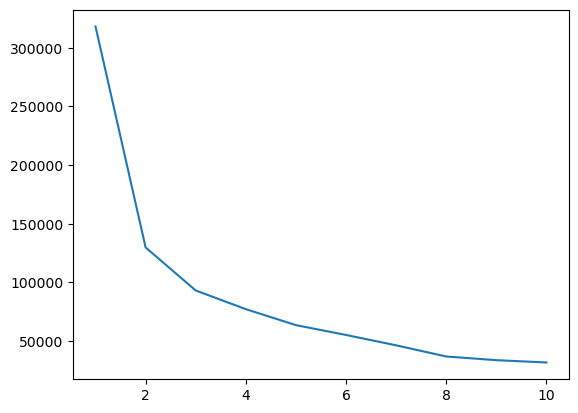

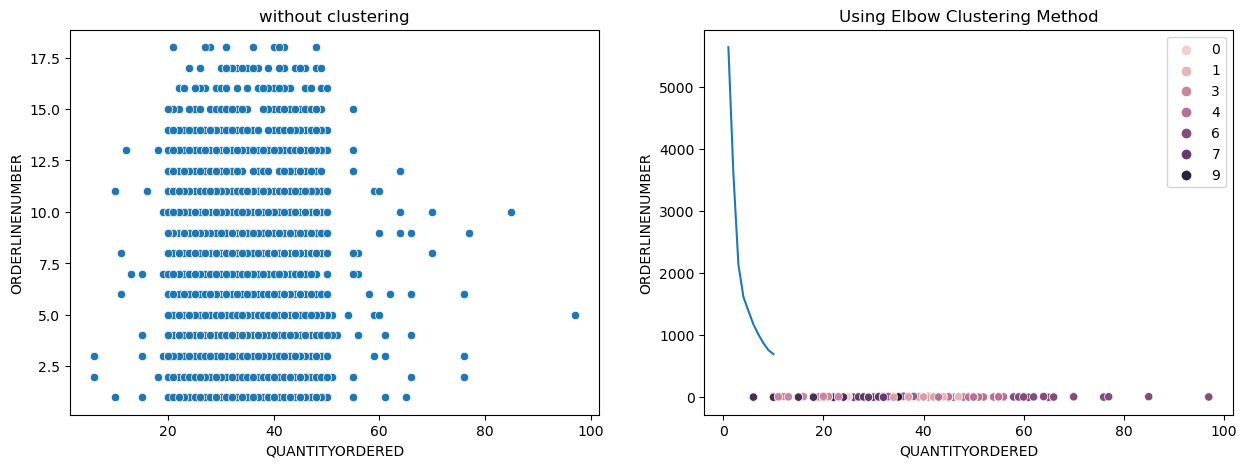

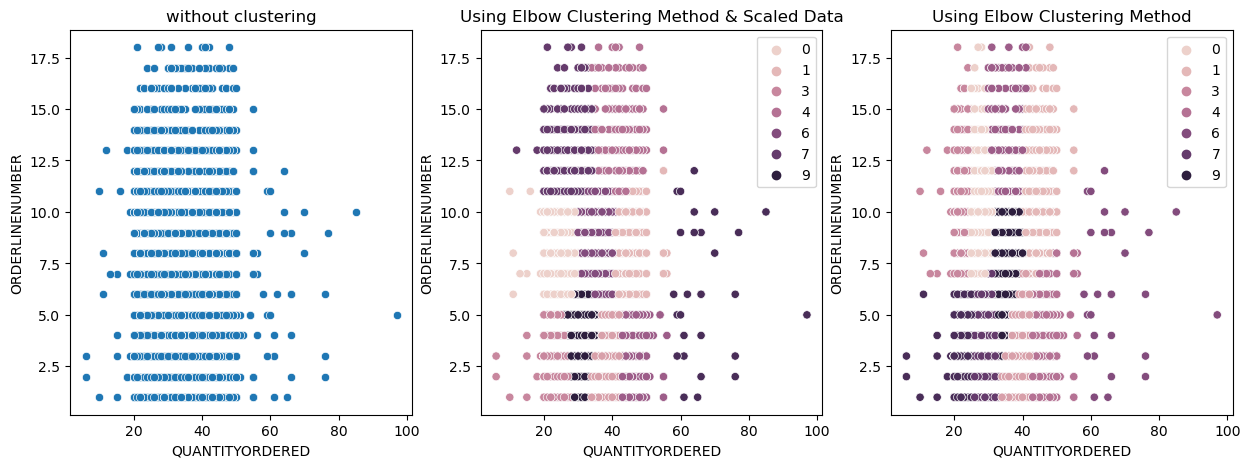

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv(r"C:\Users\NAVNATH\Downloads\ML,DAA,BT PR\ML\ML DATASETS\sales_data_sample.csv", encoding = 'latin1')
data
data.info()
data.describe()
data.columns
data.shape
data = data[['QUANTITYORDERED', 'ORDERLINENUMBER']]
new_data = data.dropna(axis = 0)
from sklearn.cluster import KMeans
import seaborn as sns

wcss = []

for i in range (1, 11):
    clustering = KMeans(n_clusters = i, init = 'k-means++', random_state=42 )
    clustering.fit(data)
    wcss.append(clustering.inertia_)
    
ks = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
sns.lineplot(x = ks, y = wcss)
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 5))
sns.scatterplot(ax = axes[0], data = new_data, x = 'QUANTITYORDERED', y = 'ORDERLINENUMBER').set_title('without clustering')
sns.scatterplot(ax = axes[1], data = new_data, x = 'QUANTITYORDERED', y = 'ORDERLINENUMBER', hue = clustering.labels_).set_title('Using Elbow Clustering Method')

new_data.describe().T
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
scaled = ss.fit_transform(new_data,)
wcss_sc = []
for i in range(1, 11):
    clustering_sc = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    clustering_sc.fit(scaled)
    wcss_sc.append(clustering_sc.inertia_)
    
ks = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
sns.lineplot(x = ks, y = wcss_sc)

fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (15, 5))
sns.scatterplot(ax = axes[0], data = new_data, x = 'QUANTITYORDERED', y = 'ORDERLINENUMBER').set_title('without clustering')
sns.scatterplot(ax = axes[2], data = new_data, x = 'QUANTITYORDERED', y = 'ORDERLINENUMBER', hue = clustering.labels_).set_title('Using Elbow Clustering Method')
sns.scatterplot(ax = axes[1], data = new_data, x = 'QUANTITYORDERED', y = 'ORDERLINENUMBER', hue = clustering_sc.labels_).set_title('Using Elbow Clustering Method & Scaled Data')